# Introduction

Since Jan. 1, 2015, [The Washington Post](https://www.washingtonpost.com/) has been compiling a database of every fatal shooting in the US by a police officer in the line of duty. 

<center><img src=https://i.imgur.com/sX3K62b.png></center>

While there are many challenges regarding data collection and reporting, The Washington Post has been tracking more than a dozen details about each killing. This includes the race, age and gender of the deceased, whether the person was armed, and whether the victim was experiencing a mental-health crisis. The Washington Post has gathered this supplemental information from law enforcement websites, local new reports, social media, and by monitoring independent databases such as "Killed by police" and "Fatal Encounters". The Post has also conducted additional reporting in many cases.

There are 4 additional datasets: US census data on poverty rate, high school graduation rate, median household income, and racial demographics. [Source of census data](https://factfinder.census.gov/faces/nav/jsf/pages/community_facts.xhtml).

### Upgrade Plotly

Run the cell below if you are working with Google Colab

In [139]:
%pip install --upgrade plotly

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


## Import Statements

In [140]:
import numpy as np
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns

# This might be helpful:
from collections import Counter

## Notebook Presentation

In [141]:
pd.options.display.float_format = '{:,.2f}'.format

## Load the Data

In [142]:
df_hh_income = pd.read_csv('Median_Household_Income_2015.csv', encoding="windows-1252")
df_pct_poverty = pd.read_csv('Pct_People_Below_Poverty_Level.csv', encoding="windows-1252")
df_pct_completed_hs = pd.read_csv('Pct_Over_25_Completed_High_School.csv', encoding="windows-1252")
df_share_race_city = pd.read_csv('Share_of_Race_By_City.csv', encoding="windows-1252")
df_fatalities = pd.read_csv('Deaths_by_Police_US.csv', encoding="windows-1252")

# Preliminary Data Exploration

* What is the shape of the DataFrames? 
* How many rows and columns do they have?
* What are the column names?
* Are there any NaN values or duplicates?

In [143]:
print(f"df_hh_income has {df_hh_income.shape[0]} columns, {df_hh_income.shape[1]} rows.")
print(f"df_pct_poverty has {df_pct_poverty.shape[0]} columns, {df_pct_poverty.shape[1]} rows.")
print(f"df_pct_completed_hs has {df_pct_completed_hs.shape[0]} columns, {df_pct_completed_hs.shape[1]} rows.")
print(f"df_share_race_city has {df_share_race_city.shape[0]} columns, {df_share_race_city.shape[1]} rows.")
print(f"df_fatalities has {df_fatalities.shape[0]} columns, {df_fatalities.shape[1]} rows.")

df_hh_income has 29322 columns, 3 rows.
df_pct_poverty has 29329 columns, 3 rows.
df_pct_completed_hs has 29329 columns, 3 rows.
df_share_race_city has 29268 columns, 7 rows.
df_fatalities has 2535 columns, 14 rows.


In [144]:
print(f"df_hh_income's columns are {df_hh_income.columns.values}.")
print(f"df_pct_poverty's columns are {df_pct_poverty.columns.values}.")
print(f"df_pct_completed_hs's columns are {df_pct_completed_hs.columns.values}.")
print(f"df_share_race_city's columns are {df_share_race_city.columns.values}.")
print(f"df_fatalities's columns are {df_fatalities.columns.values}.")

df_hh_income's columns are ['Geographic Area' 'City' 'Median Income'].
df_pct_poverty's columns are ['Geographic Area' 'City' 'poverty_rate'].
df_pct_completed_hs's columns are ['Geographic Area' 'City' 'percent_completed_hs'].
df_share_race_city's columns are ['Geographic area' 'City' 'share_white' 'share_black'
 'share_native_american' 'share_asian' 'share_hispanic'].
df_fatalities's columns are ['id' 'name' 'date' 'manner_of_death' 'armed' 'age' 'gender' 'race' 'city'
 'state' 'signs_of_mental_illness' 'threat_level' 'flee' 'body_camera'].


In [145]:
def checkNanOrDuplicates(dataset):
  if dataset.isna().values.any() == True or dataset.duplicated().any() == True:
    return "has the NaN or duplicated values."
  else:
    return "has not any NaN or duplicated value."

print("df_hh_income ", checkNanOrDuplicates(df_hh_income))
print("df_pct_poverty ", checkNanOrDuplicates(df_pct_poverty))
print("df_pct_completed_hs ", checkNanOrDuplicates(df_pct_completed_hs))
print("df_share_race_city ", checkNanOrDuplicates(df_share_race_city))
print("df_fatalities ", checkNanOrDuplicates(df_fatalities))


df_hh_income  has the NaN or duplicated values.
df_pct_poverty  has not any NaN or duplicated value.
df_pct_completed_hs  has not any NaN or duplicated value.
df_share_race_city  has not any NaN or duplicated value.
df_fatalities  has the NaN or duplicated values.


## Data Cleaning - Check for Missing Values and Duplicates

Consider how to deal with the NaN values. Perhaps substituting 0 is appropriate. 

In [146]:
df_hh_income = df_hh_income.drop_duplicates()
df_hh_income = df_hh_income.dropna()


In [147]:
df_fatalities = df_fatalities.drop_duplicates()
df_fatalities = df_fatalities.dropna()

# Chart the Poverty Rate in each US State

Create a bar chart that ranks the poverty rate from highest to lowest by US state. Which state has the highest poverty rate? Which state has the lowest poverty rate?  Bar Plot

In [148]:
df_pct_poverty["poverty_rate"] = df_pct_poverty["poverty_rate"].replace("-",0, regex=True)

In [149]:
df_pct_poverty["poverty_rate"]= df_pct_poverty["poverty_rate"].astype(float)

In [150]:
xx = df_pct_poverty.groupby("Geographic Area").agg({"poverty_rate":pd.Series.mean})
povertyRates = xx.sort_values(by="poverty_rate")


In [151]:
from plotly.graph_objs import layout
fig = px.bar(povertyRates, x=povertyRates.index, y="poverty_rate", color="poverty_rate", title="Poverty Rates Ascending By States")
fig.update_layout(yaxis_title="Poverty Rate")
fig.show()

# Chart the High School Graduation Rate by US State

Show the High School Graduation Rate in ascending order of US States. Which state has the lowest high school graduation rate? Which state has the highest?

In [152]:
df_pct_completed_hs["percent_completed_hs"] = df_pct_completed_hs["percent_completed_hs"].replace("-",0, regex=True)

In [153]:
df_pct_completed_hs["percent_completed_hs"] = df_pct_completed_hs["percent_completed_hs"].astype(float)
meanOfHighSchoolRate = df_pct_completed_hs.groupby("Geographic Area").agg({"percent_completed_hs":pd.Series.mean})
meanOfHighSchoolRate = meanOfHighSchoolRate.sort_values(by="percent_completed_hs", ascending=True)
fig = px.bar(meanOfHighSchoolRate, x=meanOfHighSchoolRate.index, y="percent_completed_hs", color="percent_completed_hs", title="High School Graduation Rate ascending by Geographic Area")
fig.update_layout(yaxis_title="Percent of completed high school")
fig.show()


# Visualise the Relationship between Poverty Rates and High School Graduation Rates

#### Create a line chart with two y-axes to show if the rations of poverty and high school graduation move together.  

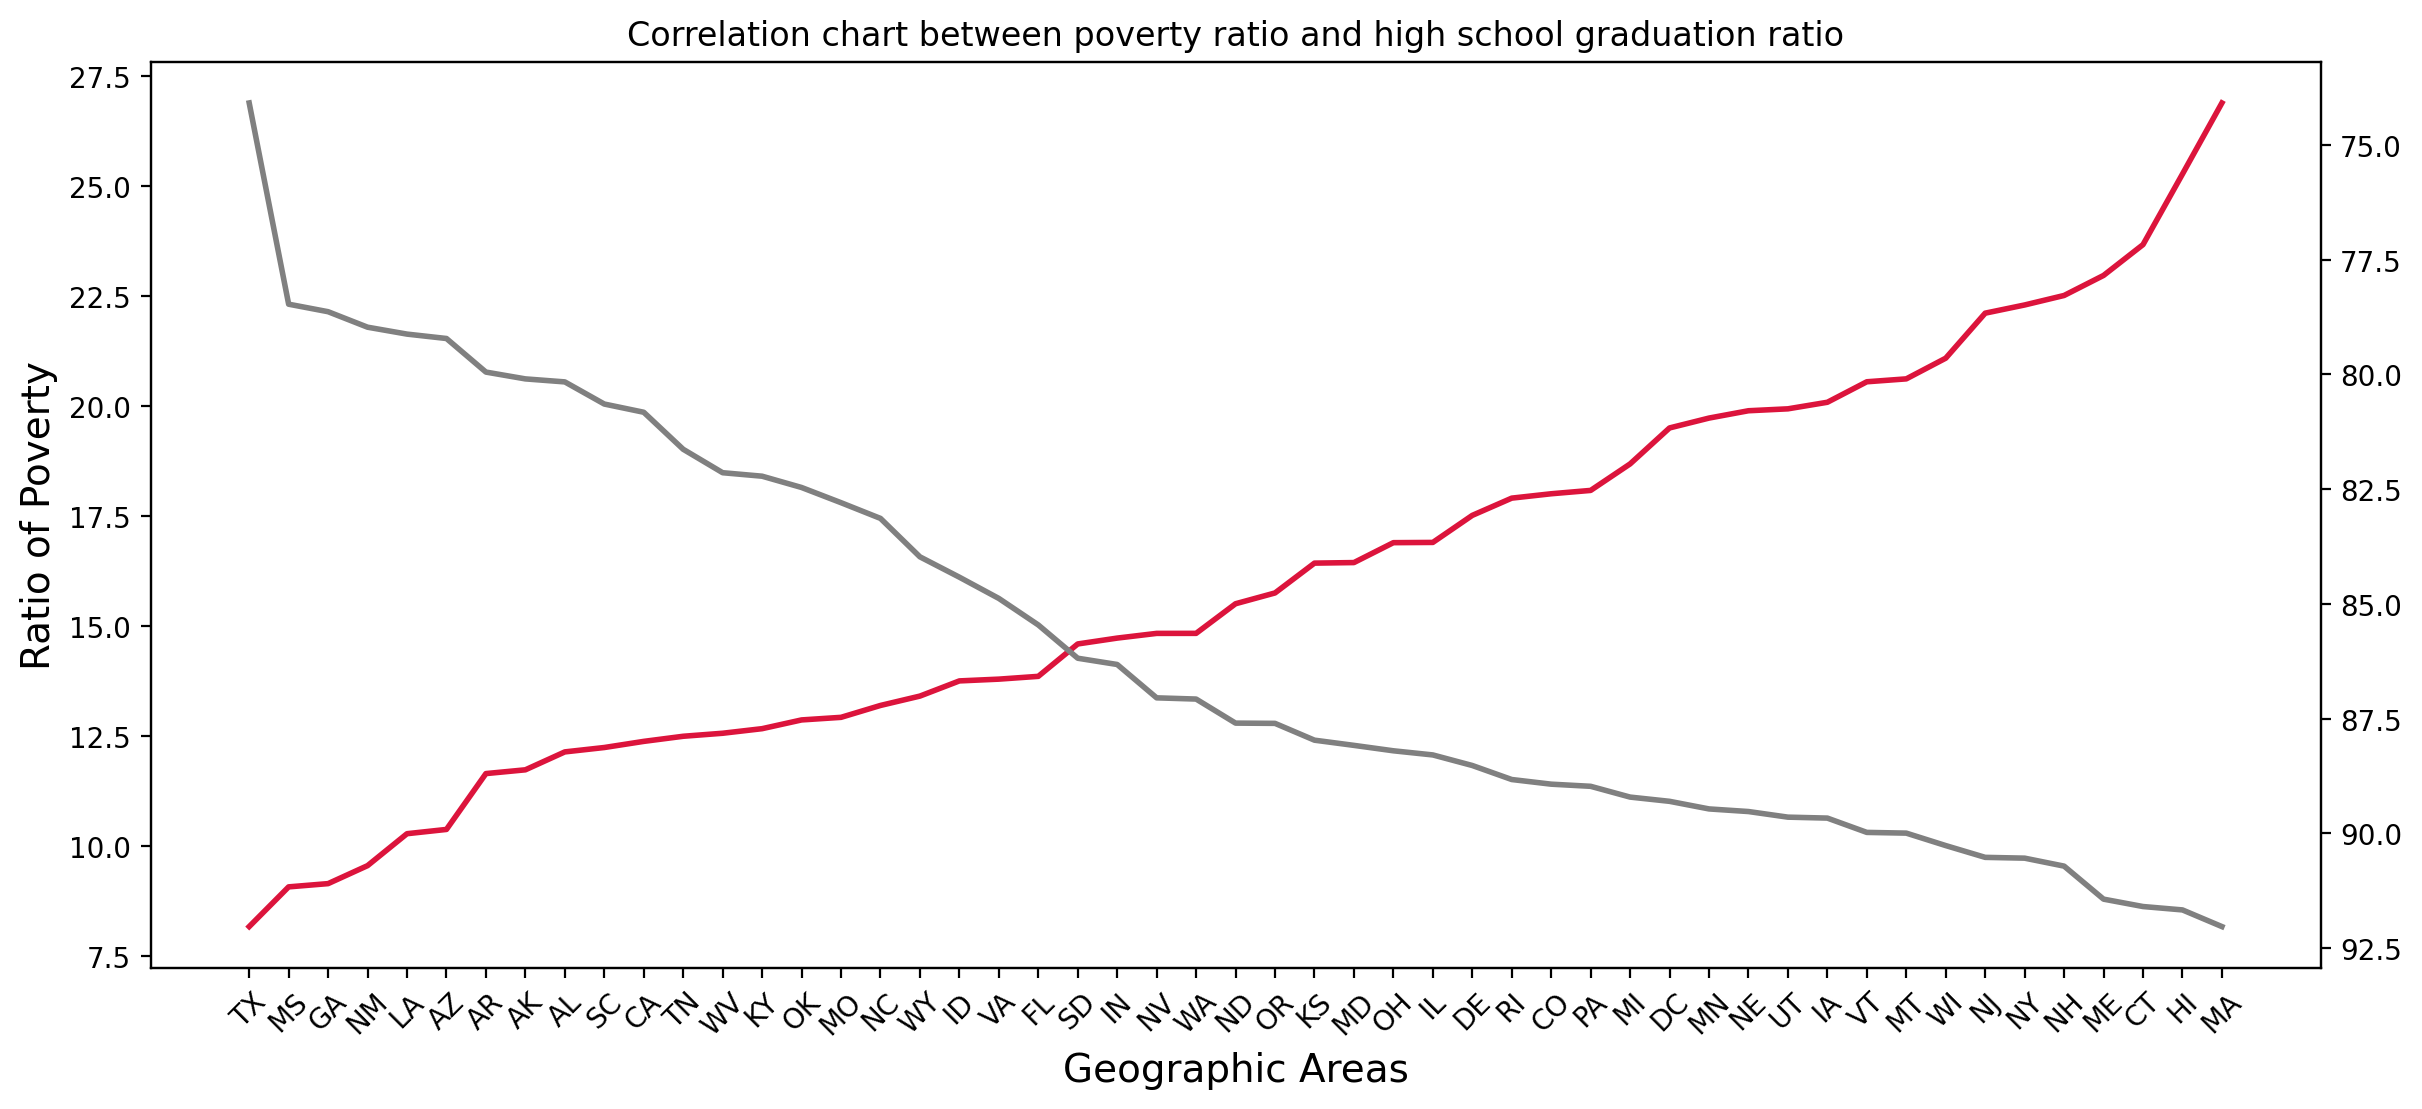

In [154]:
plt.figure(figsize=(14,6), dpi=200)
plt.title("Correlation chart between poverty ratio and high school graduation ratio")
plt.xlabel("Geographic Areas",fontsize=14)

plt.ylabel("Ratio of Poverty", fontsize=14)
ax = plt.gca()
ax.set_xticklabels(labels=povertyRates.index, rotation=45)
ax2 = ax.twinx()
ax2.invert_yaxis()
ax.plot(povertyRates.index, povertyRates.poverty_rate, c="crimson", linewidth=2)
ax2.plot(meanOfHighSchoolRate.index, meanOfHighSchoolRate.percent_completed_hs, c="grey", linewidth=2)

#### Now use a Seaborn .jointplot() with a Kernel Density Estimate (KDE) and/or scatter plot to visualise the same relationship

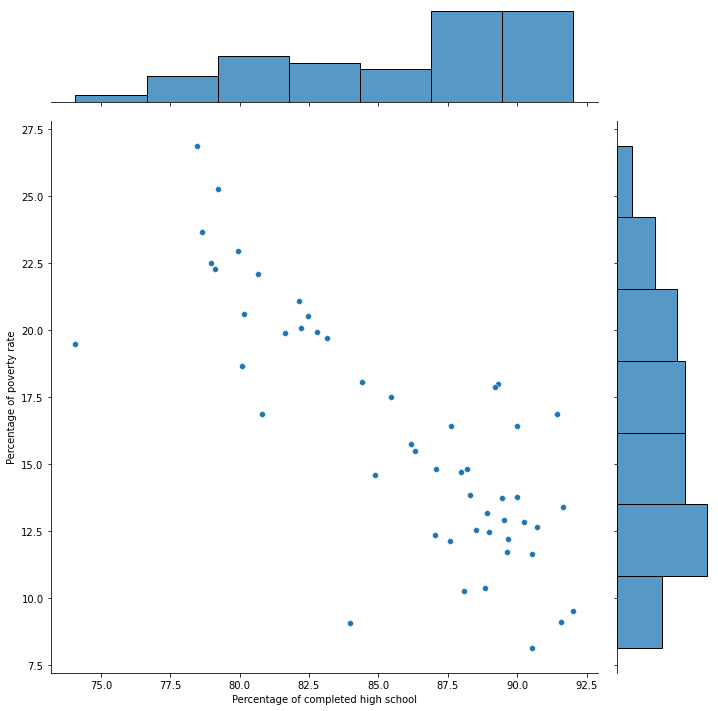

In [155]:
jj = sns.jointplot(x=meanOfHighSchoolRate.percent_completed_hs, y=povertyRates.poverty_rate, kind="scatter", height=10)
jj.set_axis_labels(xlabel="Percentage of completed high school",ylabel="Percentage of poverty rate")

#### Seaborn's `.lmplot()` or `.regplot()` to show a linear regression between the poverty ratio and the high school graduation ratio. 

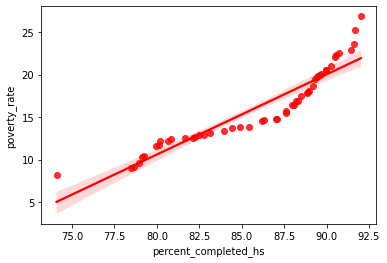

In [156]:
lm = sns.regplot(x=meanOfHighSchoolRate.percent_completed_hs, y=povertyRates.poverty_rate, color="red")

# Create a Bar Chart with Subsections Showing the Racial Makeup of Each US State

Visualise the share of the white, black, hispanic, asian and native american population in each US State using a bar chart with sub sections. 

In [157]:
df_share_race_city["share_white"] = df_share_race_city["share_white"].replace("(X)", 0, regex=True)
df_share_race_city["share_white"] = df_share_race_city["share_white"].astype(float)

df_share_race_city["share_black"] = df_share_race_city["share_black"].replace("(X)", 0, regex=True)
df_share_race_city["share_black"] = df_share_race_city["share_black"].astype(float)

df_share_race_city["share_native_american"] = df_share_race_city["share_native_american"].replace("(X)", 0, regex=True)
df_share_race_city["share_native_american"] = df_share_race_city["share_native_american"].astype(float)

df_share_race_city["share_asian"] = df_share_race_city["share_asian"].replace("(X)", 0, regex=True)
df_share_race_city["share_asian"] = df_share_race_city["share_asian"].astype(float)

df_share_race_city["share_hispanic"] = df_share_race_city["share_hispanic"].replace("(X)", 0, regex=True)
df_share_race_city["share_hispanic"] = df_share_race_city["share_hispanic"].astype(float)

sorted_values = df_share_race_city.groupby("Geographic area").agg({"share_white":pd.Series.mean, "share_black":pd.Series.mean, "share_native_american":pd.Series.mean, "share_asian":pd.Series.mean, "share_hispanic":pd.Series.mean})

sorted_values

,share_white,share_black,share_native_american,share_asian,share_hispanic
Geographic area,,,,,
AK,45.26,0.56,45.48,1.38,2.13
AL,72.51,23.32,0.66,0.48,2.98
AR,78.45,16.30,0.76,0.48,4.27
AZ,59.93,0.95,28.59,0.73,20.14
CA,71.54,2.68,1.72,5.54,29.51
CO,87.77,0.92,1.62,1.15,17.90
CT,86.11,4.99,0.66,2.99,7.98
DC,38.50,50.70,0.30,3.50,9.10
DE,76.25,15.39,0.52,2.00,7.42


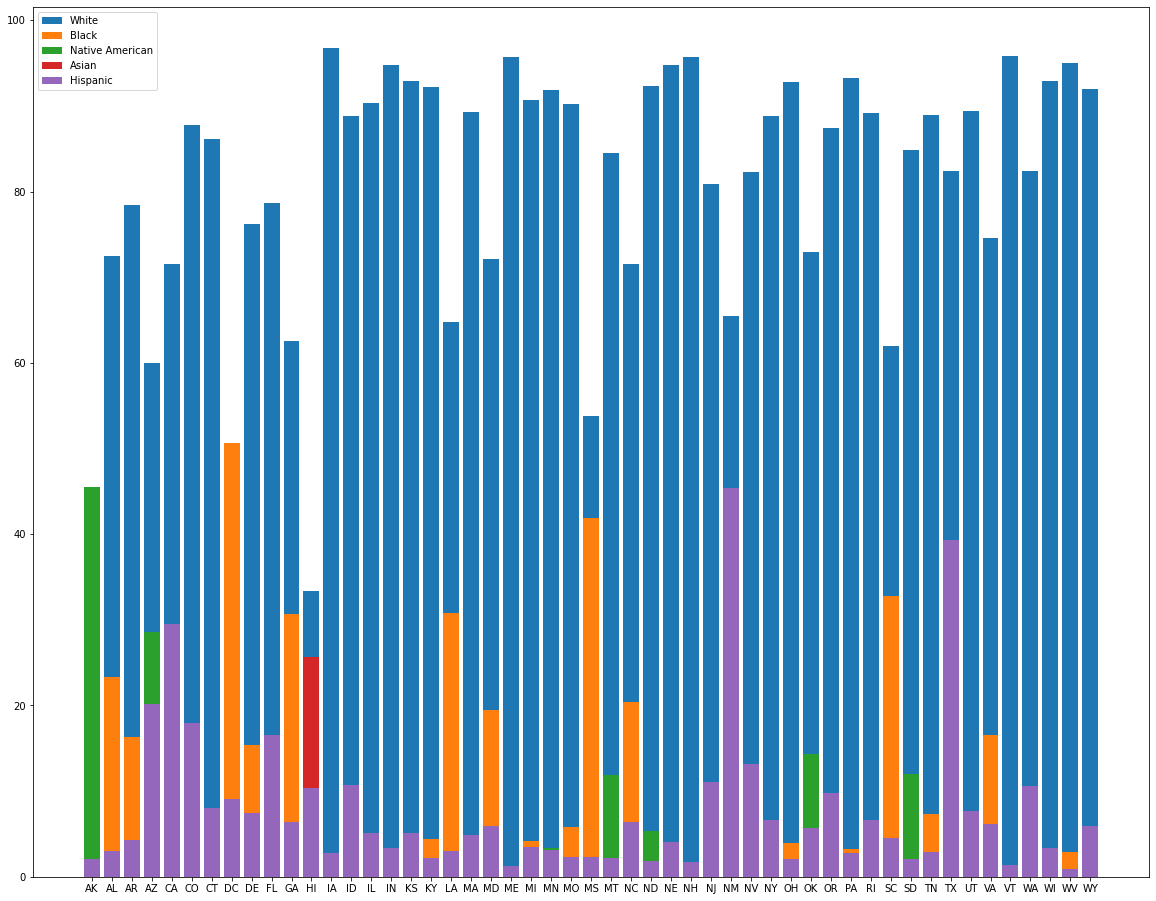

In [158]:
fig, ax = plt.subplots(figsize=(20,16))

ax.bar(sorted_values.index, sorted_values.share_white,label='White')
ax.bar(sorted_values.index, sorted_values.share_black,label='Black')
ax.bar(sorted_values.index, sorted_values.share_native_american,label='Native American')
ax.bar(sorted_values.index, sorted_values.share_asian,label='Asian')
ax.bar(sorted_values.index, sorted_values.share_hispanic,label='Hispanic')
ax.legend()

plt.show()

# Create Donut Chart by of People Killed by Race

Hint: Use `.value_counts()`

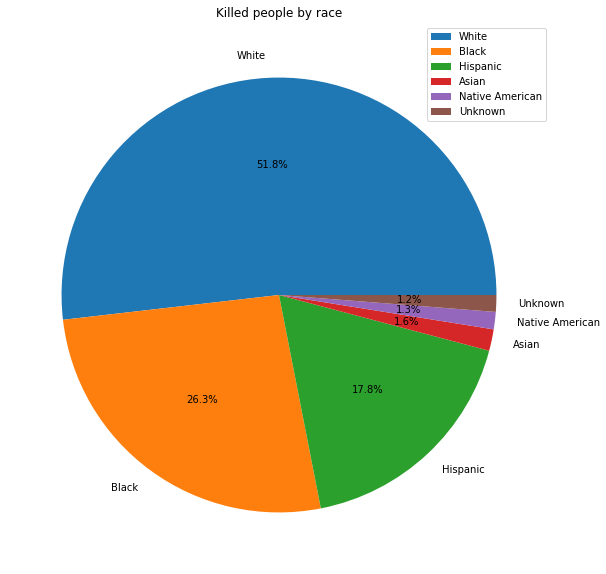

In [159]:
fig, ax = plt.subplots(figsize=(20,10))
plt.pie(df_fatalities.race.value_counts(), labels=["White","Black","Hispanic", "Asian","Native American","Unknown"], autopct='%.1f%%')
plt.legend()
plt.title("Killed people by race")
plt.show()

# Create a Chart Comparing the Total Number of Deaths of Men and Women

Use `df_fatalities` to illustrate how many more men are killed compared to women. 

In [160]:
df_fatalities.gender.value_counts()

M    2160
F      94
Name: gender, dtype: int64

# Create a Box Plot Showing the Age and Manner of Death

Break out the data by gender using `df_fatalities`. Is there a difference between men and women in the manner of death? 

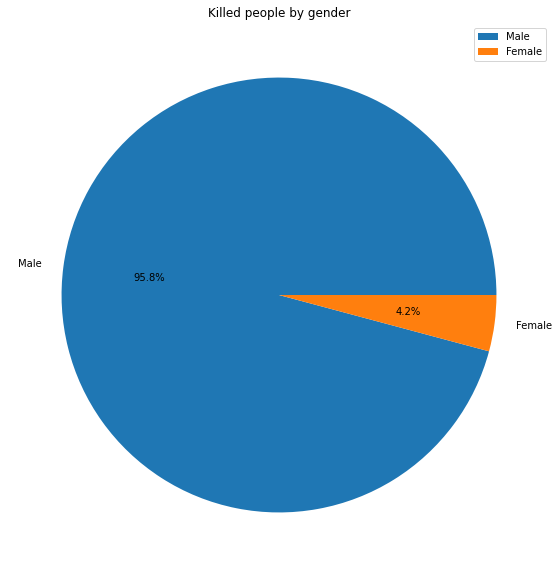

In [161]:
fig, ax = plt.subplots(figsize=(20,10))
plt.pie(df_fatalities.gender.value_counts(), labels=["Male","Female"], autopct='%.1f%%')
plt.legend()
plt.title("Killed people by gender")
plt.show()

In [162]:
df_fatalities[df_fatalities.gender == "M"].manner_of_death.value_counts()

shot                2011
shot and Tasered     149
Name: manner_of_death, dtype: int64

In [163]:
df_fatalities[df_fatalities.gender == "F"].manner_of_death.value_counts()

shot                89
shot and Tasered     5
Name: manner_of_death, dtype: int64

# Were People Armed? 

In what percentage of police killings were people armed? Create chart that show what kind of weapon (if any) the deceased was carrying. How many of the people killed by police were armed with guns versus unarmed? 

In [164]:
df_fatalities.armed.unique()

array(['gun', 'unarmed', 'toy weapon', 'nail gun', 'knife', 'vehicle',
       'shovel', 'hammer', 'hatchet', 'undetermined', 'sword', 'machete',
       'box cutter', 'metal object', 'screwdriver', 'lawn mower blade',
       'flagpole', 'guns and explosives', 'cordless drill', 'metal pole',
       'Taser', 'metal pipe', 'metal hand tool', 'blunt object',
       'metal stick', 'sharp object', 'meat cleaver', 'carjack', 'chain',
       "contractor's level", 'unknown weapon', 'stapler', 'crossbow',
       'bean-bag gun', 'baseball bat and fireplace poker',
       'straight edge razor', 'gun and knife', 'ax', 'brick',
       'baseball bat', 'hand torch', 'chain saw', 'garden tool',
       'scissors', 'pole', 'pick-axe', 'flashlight', 'spear', 'pitchfork',
       'hatchet and gun', 'rock', 'piece of wood', 'bayonet',
       'glass shard', 'motorcycle', 'metal rake', 'baton', 'crowbar',
       'oar', 'machete and gun', 'air conditioner', 'pole and knife',
       'beer bottle', 'pipe', 'baseba

In [165]:
xx = df_fatalities[df_fatalities.armed == "unarmed"].armed.value_counts()[0]
print(f" {xx} people who was killed by police were unarmed") 


 165 people who was killed by police were unarmed


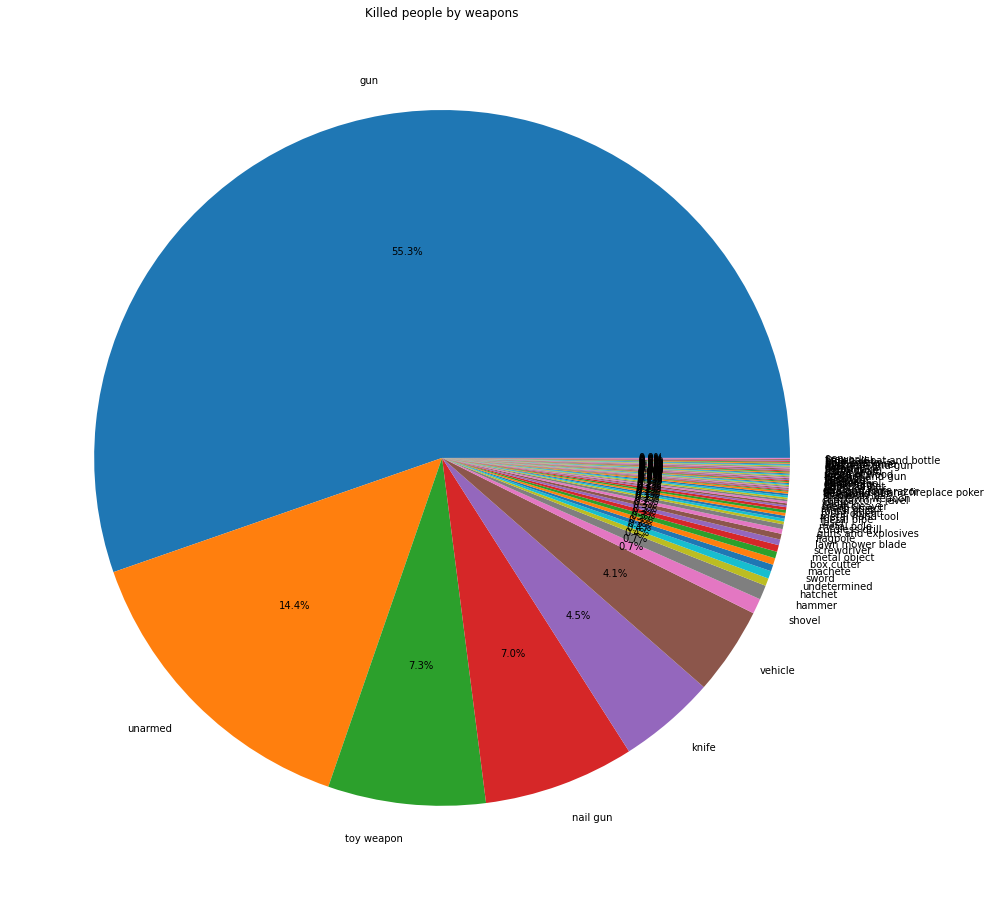

In [166]:
fig, ax = plt.subplots(figsize=(16,16))
plt.pie(df_fatalities.armed.value_counts(), labels=df_fatalities.armed.unique(),autopct='%.1f%%')
plt.title("Killed people by weapons")
plt.show()



# How Old Were the People Killed?

:Work out what percentage of people killed were under 25 years old.  

In [167]:
total_killed_people = len(df_fatalities.age)
under_25 = len(df_fatalities[df_fatalities.age == 25])
print(f"{under_25*100/total_killed_people}% of killed people were under 25 years old")

4.2147293700088735% of killed people were under 25 years old


Create a histogram and KDE plot that shows the distribution of ages of the people killed by police. 

In [168]:
df_fatalities.age.value_counts()

25.00    95
36.00    85
29.00    78
31.00    78
24.00    74
         ..
80.00     1
6.00      1
75.00     1
77.00     1
79.00     1
Name: age, Length: 72, dtype: int64

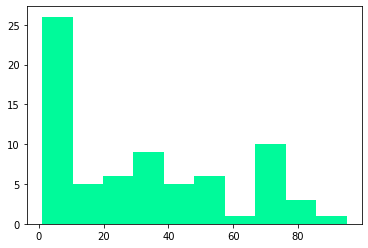

In [169]:
plt.hist(df_fatalities.age.value_counts(), color="mediumspringgreen")
plt.show()

Create a seperate KDE plot for each race. Is there a difference between the distributions? 

# Race of People Killed

Create a chart that shows the total number of people killed by race. 

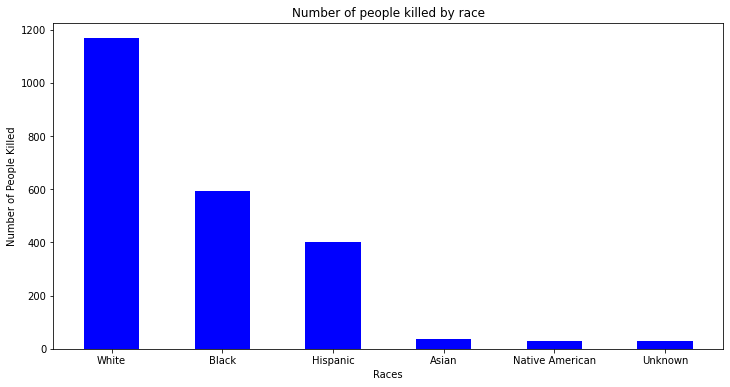

In [170]:
plt.figure(figsize=(12,6))
plt.bar(["White","Black","Hispanic","Asian","Native American","Unknown"], df_fatalities.race.value_counts().values, width = 0.5, color="blue")
plt.xlabel("Races")
plt.ylabel("Number of People Killed")
plt.title("Number of people killed by race")
plt.show()

# Mental Illness and Police Killings

What percentage of people killed by police have been diagnosed with a mental illness?

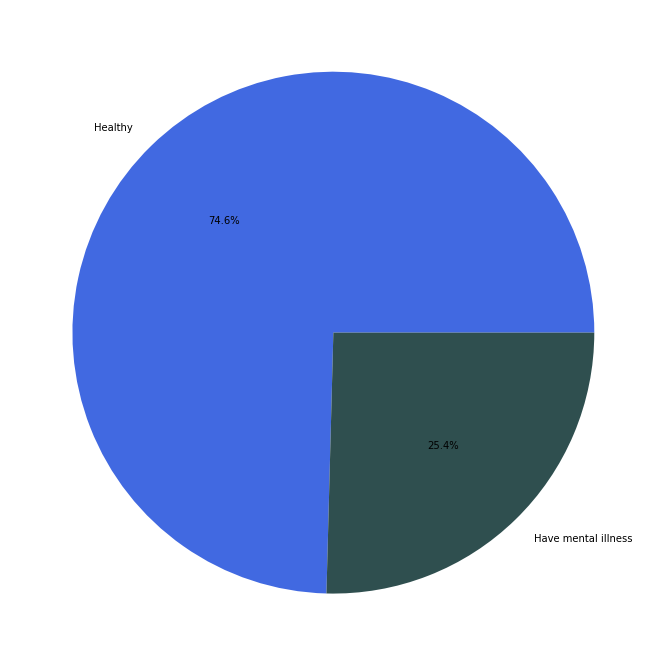

In [171]:
xx = df_fatalities.signs_of_mental_illness.value_counts()

plt.figure(figsize=(18,12))
plt.pie(xx,labels=["Healthy", "Have mental illness"], autopct='%.1f%%', colors=["royalblue","darkslategray"])
plt.show()

# In Which Cities Do the Most Police Killings Take Place?

Create a chart ranking the top 10 cities with the most police killings. Which cities are the most dangerous?  

In [172]:
df_fatalities.city.value_counts().head(10)

Los Angeles     35
Phoenix         28
Houston         24
Chicago         22
Austin          18
Las Vegas       17
Columbus        16
Miami           15
San Antonio     15
Indianapolis    14
Name: city, dtype: int64

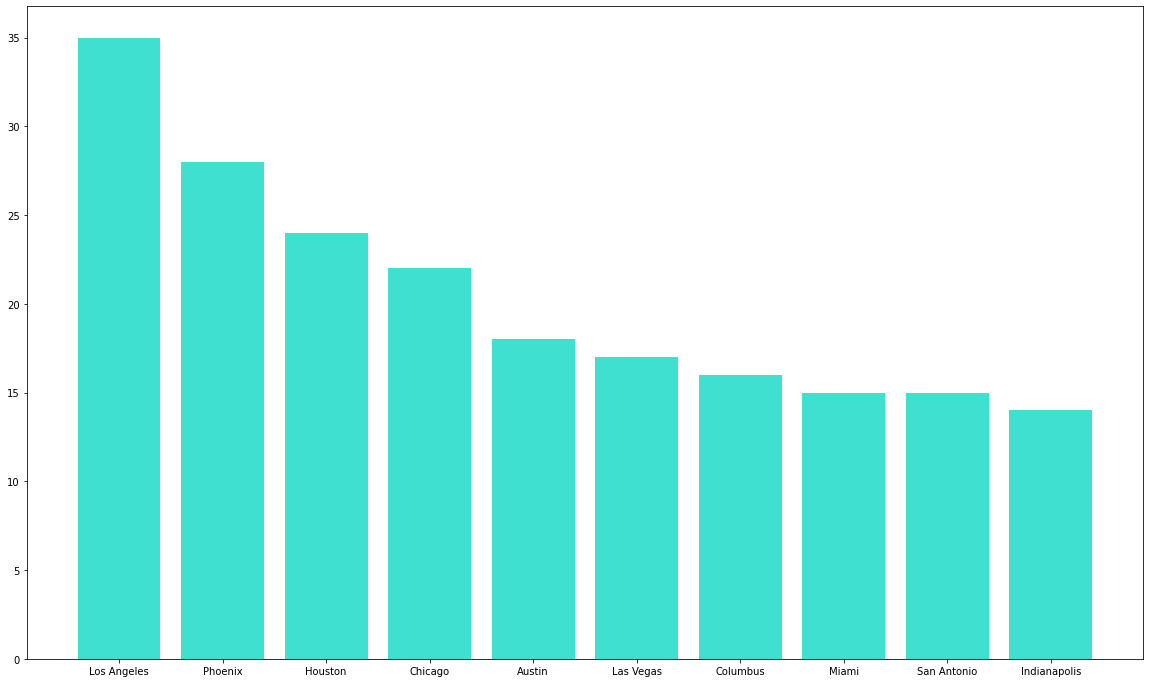

In [173]:
plt.figure(figsize=(20,12))
plt.bar(df_fatalities.city.value_counts().head(10).index, df_fatalities.city.value_counts().head(10).values, color="turquoise")
plt.show()

# Rate of Death by Race

Find the share of each race in the top 10 cities. Contrast this with the top 10 cities of police killings to work out the rate at which people are killed by race for each city. 

In [174]:
df_share_race_city[df_share_race_city.City == "Miami"]


,Geographic area,City,share_white,share_black,share_native_american,share_asian,share_hispanic


# Number of Police Killings Over Time

Analyse the Number of Police Killings over Time. Is there a trend in the data? 

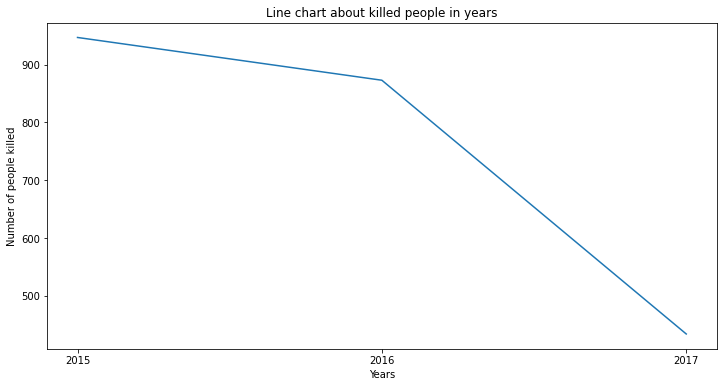

In [177]:
plt.figure(figsize=(12,6))
df_fatalities["year"] = df_fatalities.date.str.split("/", expand=True)[2]
plt.plot(["2015","2016","2017"], df_fatalities.year.value_counts().values)
plt.xlabel("Years")
plt.ylabel("Number of people killed")
plt.title("Line chart about killed people in years")
plt.show()